# Creating Maps

```{admonition} Summary
:class: hint


```

To visualize the data, the data should be loaded using the `geopandas` package as explained in the previous section. Then use the `plot` function to visualize the data.

## Static maps

Using the `plot` function, without additional customization will produce a basic, static plot of the data with default settings.

In [2]:
import geopandas as gp
from pathlib import Path

INPUT = Path.cwd().parents[0] / "00_data"
gdb_path = INPUT / "LBM_2018_IS_DD_gdb" / "LBM_2018_IS_DD.gdb"

gdf = gp.read_file(gdb_path, layer="LBM2018_IS_DD")

/opt/conda/envs/worker_env/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [3]:
filter_db = gdf[gdf['Shape_Area'] < 1000]

<Axes: >

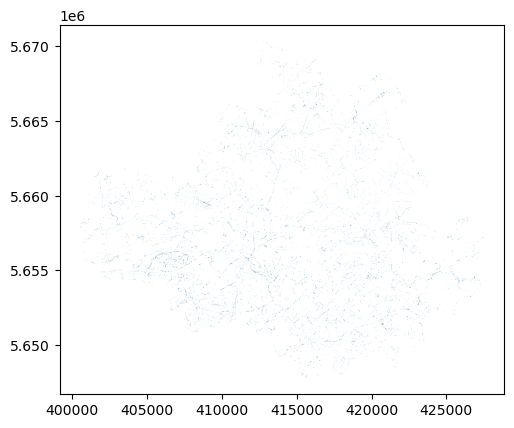

In [4]:
filter_db.plot()

To have a better visualization of the data, some features of the plot can be customized:

- `linewidth`: The thickness of the lines
- `edgecolor`: The color of the edges of shapes
- `set_title`: Title of plot
- `set_axis_off`: Hides the axis

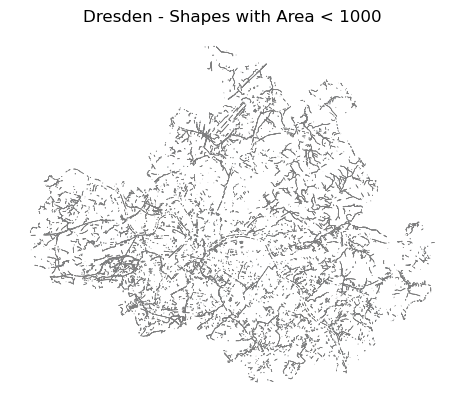

In [5]:
ax = filter_db.plot(linewidth=0.5, edgecolor='0.5')
ax.set_title("Dresden - Shapes with Area < 1000")
ax.set_axis_off()

For having more control over the figure, it is usually adviced to create a matplotlib figure object ahead of time.

For this reason the package imported.

In [6]:
import matplotlib.pyplot as plt

Then by defining different parameters for figure and subplots the visualization are customized. 

- `Figure (fig)`: The overall canvas containing the subplots
- `Subplot (ax)`: An individual plotting area inside the figure
- `nrows` and `ncols`: The number of the subplots in each row and column of the figure
- `figsize`: The size of the figure in inch
- `dpi`: The resolution of the figure

The `ax` parameter in the `plot` is used to specify in which subplot, the plot should be created.

```{admonition} How **ax** parameter works!
:class: dropdown
In the following example, there is just one subplot in the figure. But in case there are more subplots the `ax` parameter works as the following example:

fig, ax = plt.subplots(nrows=2, ncols=3) # Creating 6 subplots 2 in rows, 3 in columns

- ax1 = ax[0, 0]  # First row, first column
- ax2 = ax[0, 1]  # First row, second column
- ax3 = ax[0, 2]  # First row, third column
- ax4 = ax[1, 0]  # Second row, first column
- ax5 = ax[1, 1]  # Second row, second column
- ax6 = ax[1, 2]  # Second row, third column



**Examples**:

- Plot in the First row, third column:

ax3 = filter_db.plot(ax=ax3, linewidth=0.5, edgecolor='0.5') 

ax3.set_title("Figure 3")

- Plot in the Second row, first column

ax4 = filter_db.plot(ax=ax4, linewidth=0.5, edgecolor='0.5') 

ax4.set_title("Figure 4") 
```

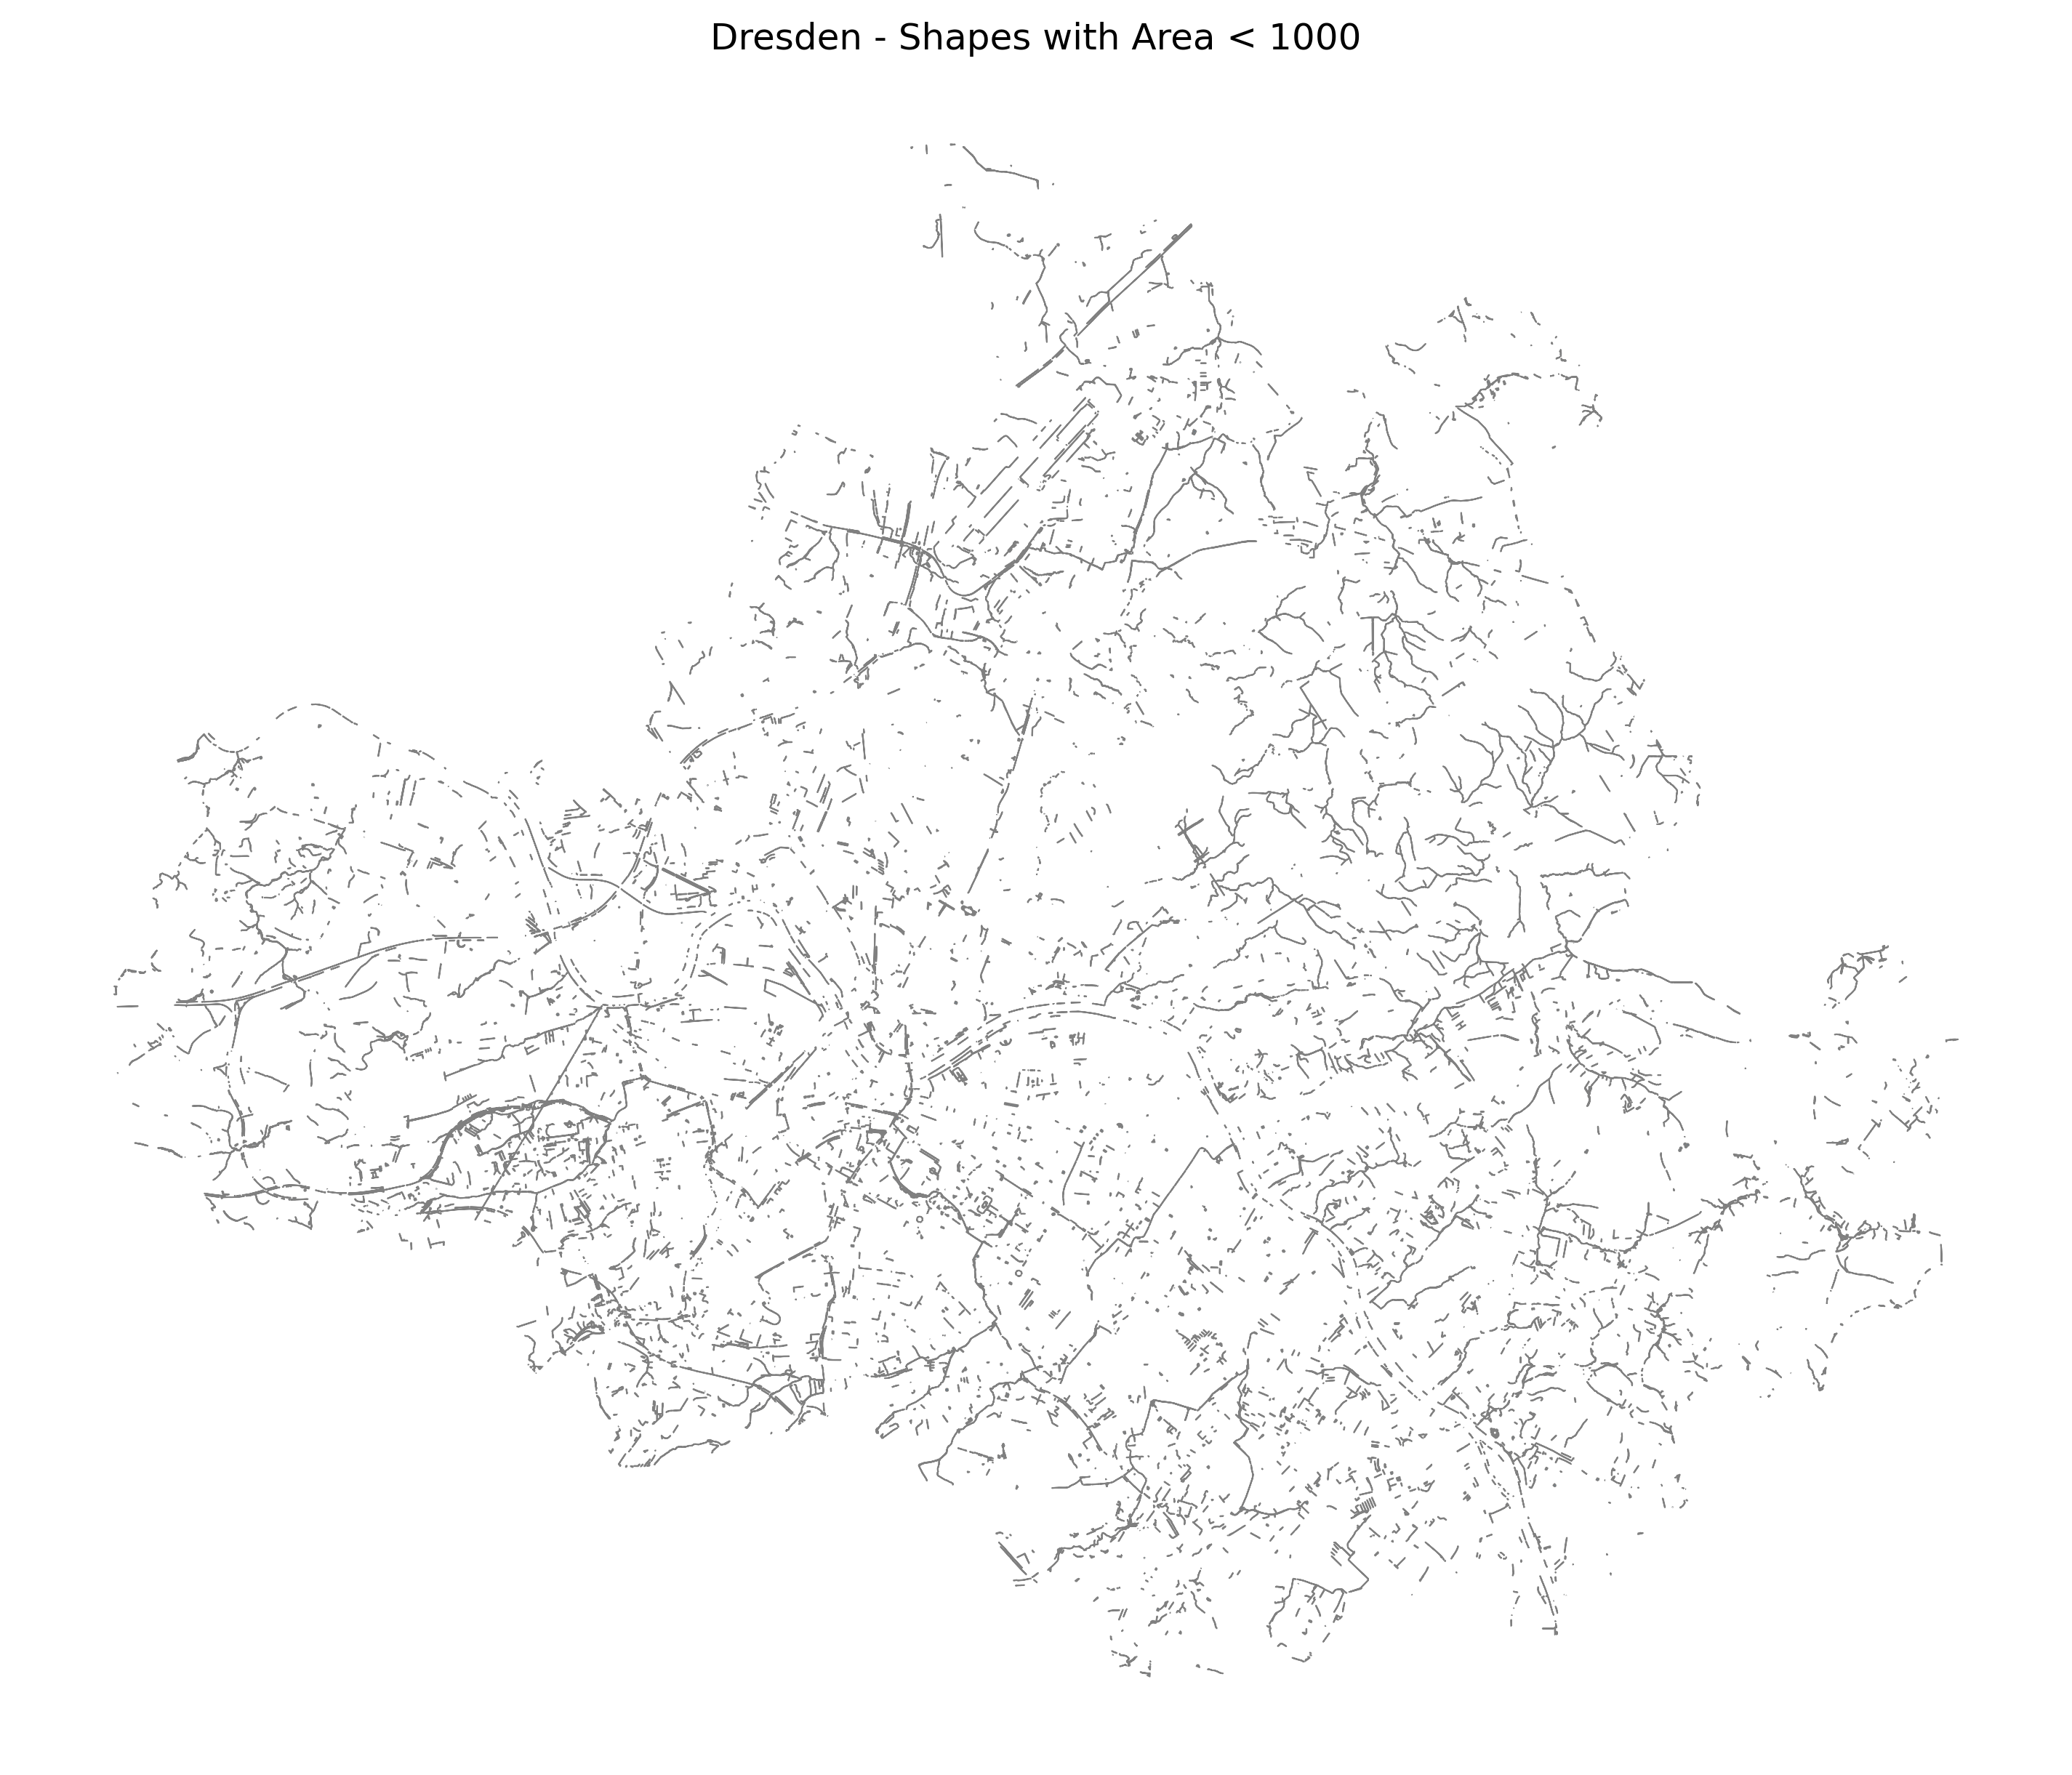

In [7]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 18), dpi=300)
ax = filter_db.plot(ax=ax, linewidth=0.5, edgecolor='0.5')
ax.set_title("Dresden - Shapes with Area < 1000")
ax.set_axis_off()

In [ ]:
To show a specific rows of the dataset, the `loc` method is used to define the rows.

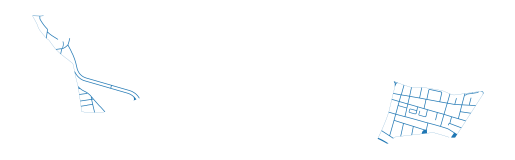

In [45]:
gdf_rows = gdf.iloc[[100,101,123]] 
ax=gdf_rows.plot()
ax.set_axis_off()

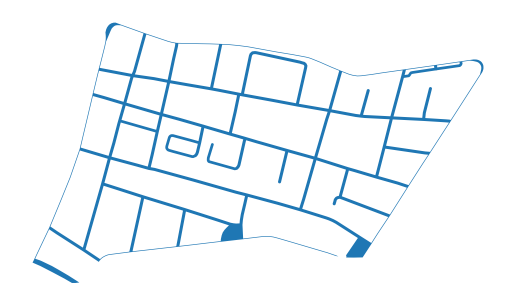

In [46]:
gdf_rows = gdf.iloc[[100]] 
ax=gdf_rows.plot()
ax.set_axis_off()

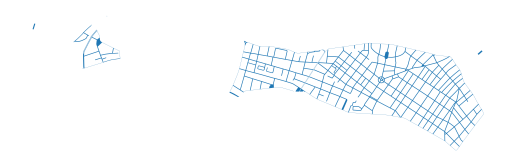

In [47]:
gdf_rows = gdf.iloc[100:111]
ax=gdf_rows.plot()
ax.set_axis_off()

To show a specific area of the dataset, the data can be clipped to a defined bounding box and then visualized.

First, the bounding box including min/max of longitude and latitude which represent lower/upper left and right coordinates of the box for the required features are extracted.

First, the bounding box is extracted using the `total_bounds`for the required features, providing four values: 
- `Minimum longitude` representing the left boundary
- `Minimum latitude` representing the lower boundary
- `Maximum longitude` representing the right boundary
- `Maximum latitude` representing the upper boundary

In the following example, the bounding box for the features in rows 100 to 110 is extracted and stored in separate variables.

In [8]:
lonmin, latmin, lonmax, latmax = gdf[100:110].total_bounds
print(lonmin, latmin, lonmax, latmax)

409469.5248999996 5654741.2675 416922.3970999997 5656956.8463


Then, the geometries that fall within the generated bounding box are filtered.

In [9]:
gdf_filtered = gdf[
    (gdf.geometry.bounds.minx >= lonmin) & 
    (gdf.geometry.bounds.maxx <= lonmax) & 
    (gdf.geometry.bounds.miny >= latmin) & 
    (gdf.geometry.bounds.maxy <= latmax)
]

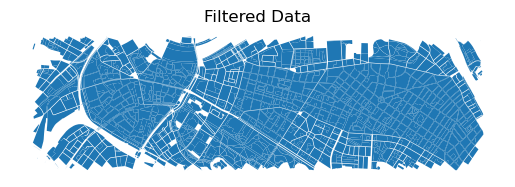

In [10]:
ax = gdf_filtered.plot()
ax.set_title("Filtered Data")
ax.set_axis_off()

In [ ]:
#################################3 this line should move to clip chapter

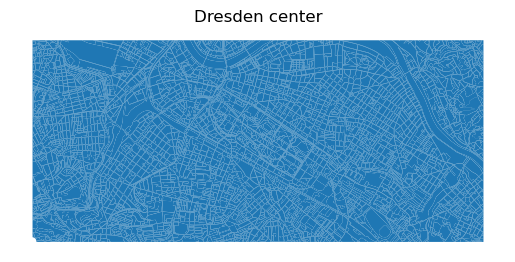

To enhance the plot, you can customize the styling. 
- `column` shows the column that is mapped to color. - `cmap` defines the [color map](https://matplotlib.org/stable/gallery/color/colormap_reference.html#reverse-cmap).
- `legend`= True, adds the legend.
- `legend_kwds` adds the legend label and defines the orientation.

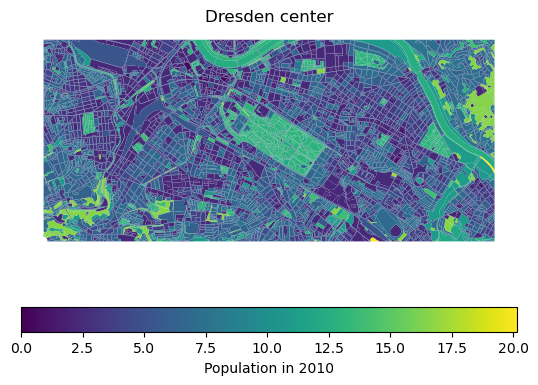

In [15]:
ax = gdf_clipped.plot(
    column='Biotpkt2018', cmap='viridis',
    legend=True,
    legend_kwds={"label": "Population in 2010", "orientation": "horizontal"})
ax.set_title('Dresden center')
ax.set_axis_off()

## Interactive maps

It is also possible to use a widget to interactively visualize the desired part of the data.

For this purpose, the [package ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) and the function `interact` from that library are imported.

In [16]:
import ipywidgets as widgets
from ipywidgets import interact

Then, a function is defined using def to display the features within the desired range.

The interactive part uses a slider to visualize different sections within the desired range.

- The `interact` function creates the slider by linking it to the user-defined function ShapeArea.
- ShapeArea is the defined `function name`.
- The values are defined between the `min` and `max` required areas with an interval (`step`) of 0.1. 

In the second line, the maximum value is set to 10000 to limit the data, and by moving the slider, the range of visualization changes accordingly.

In [17]:
def ShapeArea(value):
    filtered_gdf = gdf[gdf['Shape_Area'] <= value]
    ax= filtered_gdf.plot()
    ax.set_axis_off()
    plt.show()  

interact(ShapeArea, value=widgets.FloatSlider(min=20000, max=70000, step=0.1));

interactive(children=(FloatSlider(value=20000.0, description='value', max=70000.0, min=20000.0), Output()), _d…

<video autoplay loop muted no-controls>
  <source src="../_static/videos/Video3.webm" type="video/webm" />
  <figcaption>Interactive Plot</figcaption>
  Your browser does not support the video tag.
</video>
<figcaption>Interactive Plot</figcaption>

<video autoplay loop muted no-controls>
  <source src="../_static/videos/Video3.webm"/>
  <figcaption>Interactive Plot</figcaption>
  Your browser does not support the video tag.
</video>
<figcaption>Interactive Plot</figcaption>

The [folium library](https://realpython.com/python-folium-web-maps-from-data/) could be used to create an interactive map from the data.

In [18]:
import folium

The first step is to create a base map using the `map` function. In order to focus the map on the area of interest and also to define the level of detail that is of interest, the area center is defined as `location` and the zoom level as `zoom-start`.

In [19]:
basemap = folium.Map(location=[51.0504, 13.7373], zoom_start=14)

`````{admonition} How to find coordinates and zoom levels
:class: tip
- **NOTE:** The easiest way to find the center coordinates and desired zoom level is to use online maps like [MapTiler](https://www.maptiler.com/maps/#style=streets-v2&lang=auto&mode=2d&position=14.48/51.0496/13.738) and [OpenStreeMap](https://www.openstreetmap.org/#map=13/51.04679/13.73111). Zoom in and out to find the optimal area and detail level, then check the URL for the information.
- **Example:** In the URL `14.48/51.0496/13.738`, 14.48 is the zoom level, 51.0496 is the latitude and 13.738 is the longitude.
`````

```{figure} ../resources/11.png
:height: 150px
:name: figure-example

Set coordinates and zoom levels using URL in MapTiler
```

Clip to local area

In [20]:
local_area = gdf[82:88].total_bounds

In [21]:
gdf_clipped = gp.clip(gdf, local_area)

The data should now be added to the basemap. 

In [22]:
folium.GeoJson(gdf_clipped).add_to(basemap)

The map is displayed by calling the base map name.

In [23]:
basemap